In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.layers import Dense,Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
%matplotlib inline

Using TensorFlow backend.


In [0]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

[5]


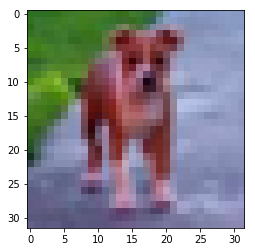

In [3]:
plt.imshow(xtrain[4534])
print(ytrain[4534])

In [4]:
xtrain.shape
xtest.shape

(10000, 32, 32, 3)

In [0]:
xtrain=xtrain.reshape(50000,3072)
xtest=xtest.reshape(10000,3072)

In [0]:
xtrain=xtrain.astype("float32")
xtest=xtest.astype("float32")
xtrain=xtrain/255      # preprocessing
xtest=xtest/255

In [0]:
ytrain=to_categorical(ytrain,10)
ytest=to_categorical(ytest,10)

In [13]:
# creating model 
model=Sequential()
model.add(Dense(512,input_shape=(3072,),activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(250,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(125,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               128250    
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1260      
Total params: 1,734,261
Trainable params: 1,734,261
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="RMSprop")

In [15]:
model.fit(xtrain,ytrain,epochs=60,batch_size=125,validation_data=(xtest, ytest))

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 3s 55us/step - loss: 2.1075 - acc: 0.2452 - val_loss: 1.8256 - val_acc: 0.3364
Epoch 2/60
50000/50000 [==============================] - 2s 46us/step - loss: 1.8550 - acc: 0.3290 - val_loss: 1.7543 - val_acc: 0.3732
Epoch 3/60
50000/50000 [==============================] - 2s 45us/step - loss: 1.7833 - acc: 0.3571 - val_loss: 1.6909 - val_acc: 0.3990
Epoch 4/60
50000/50000 [==============================] - 2s 46us/step - loss: 1.7383 - acc: 0.3778 - val_loss: 1.6402 - val_acc: 0.4202
Epoch 5/60
50000/50000 [==============================] - 2s 46us/step - loss: 1.6993 - acc: 0.3920 - val_loss: 1.5950 - val_acc: 0.4407
Epoch 6/60
50000/50000 [==============================] - 2s 45us/step - loss: 1.6674 - acc: 0.4036 - val_loss: 1.5793 - val_acc: 0.4425
Epoch 7/60
50000/50000 [==============================] - 2s 46us/step - loss: 1.6452 - acc: 0.4122 - val_loss: 1.7076 - val_acc

In [16]:
predict=model.evaluate(xtest,ytest)


10000/10000 [==============================] - 0s 45us/step


In [17]:
print("loss:",predict[0],"\naccuracy:",predict[1]*100)

loss: 1.4070718894958496 
accuracy: 49.91
